In [4]:
# Does not need to be executed if
# ~/.ipython/profile_default/ipython_config.py
# exists and contains:
# get_config().InteractiveShell.ast_node_interactivity = 'all'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
%config InlineBackend.figure_format = 'retina'

In [6]:
from collections import namedtuple, defaultdict
from math import hypot
import matplotlib.pyplot as plt

A point on the plane is defined by its $x$- and $y$-coordinates; it can therefore be represented by a 2-element list or tuple, but it is more elegant to take advantage of the `namedtuple` class from the `collections` module. The point coordinates can be referred to thanks to a more natural syntax, though indexes can still be used:

In [7]:
Point = namedtuple('Point', 'x y')
# Alternatively:
# Point = namedtuple('Point', ['x', 'y'])

pt = Point(3, 5.5)

pt
pt.x, pt[0]
pt.y, pt[1]

Point(x=3, y=5.5)

(3, 3)

(5.5, 5.5)

Given a positive integer $k$, $k$-clustering is a technique to group points on the plane into at most $k$ clusters, starting with $k$ given points, the centroids.

* Each centroid $C$ is associated with the set $S_C$ of points that are closest to $C$ than to any other centroid. In case a point is closest to more than one centroid, one is chosen arbitrarily. A centroid can be such that every point is closest to another centroid, in which case the number of nonempty sets so created is smaller than $k$.
* For each nonempty set of the form $S_C$ with $C$ an initial centroid, the centre of gravity of $S_C$ is computed and becomes a new centroid. The procedure is repeated using the new centroids instead of the original ones.
* The procedure is possibly repeated again and again, up to the stage where the centroids computed at the end of the stage are the same as those used at the beginning. Each set of points associated with one of the final centroids is a final cluster.

Comparing distances is equivalent to comparing squares of distances, so we opt for a more economical computation and implement a function, `square_of_distance()`, to compute the latter. If we had to compute distances, we could use the `hypot()` function from the `math` module:

In [17]:
def square_of_distance(point_1, point_2):
    return (point_1.x - point_2.x) ** 2 + (point_1.y - point_2.y) ** 2

pt_1 = Point(65, 82)
pt_2 = Point(52, 93)
square_of_distance(pt_1, pt_2)
hypot(pt_1.x - pt_2.x,pt_1.y - pt_2.y) 

290

17.029386365926403

Let us define a number of points and centroids:

In [20]:
points = {Point(20, 40), Point(20, 42), Point(20, 44), Point(20, 46),
          Point(20, 46), Point(20, 52), Point(20, 90), Point(38, 85),
          Point(83, 95), Point(53, 87), Point(39, 98), Point(44, 73),
          Point(65, 82), Point(52, 93), Point(63, 34), Point(71, 27)
         }
centroids = {Point(20, 95), Point(20, 5), Point(52, 83), Point(73, 33),
             Point(85, 38)
            }

To compute the member of `centroids` that is closest to a given point $P$, one can start with the square of the distance from $P$ to some centroid, and update that value whenever a new centroid $C$ is processed and the square of the distance between $C$ and $P$ is found out to be smaller than the smallest value recorded so far:

In [21]:
point = Point(70, 80)
centroids_list = list(centroids)
minimal_squared_distance = square_of_distance(point, centroids_list[0])
print('Smallest squared distance so far:', minimal_squared_distance)
print('Closest centroid so far:', centroids_list[0])
for centroid in centroids_list[1 : ]:
    squared_distance = square_of_distance(point, centroid)
    if squared_distance < minimal_squared_distance:
        minimal_squared_distance = squared_distance
        print('\nSmallest squared distance now:', minimal_squared_distance)
        print('Closest centroid now:', centroid)

Smallest squared distance so far: 2218
Closest centroid so far: Point(x=73, y=33)

Smallest squared distance now: 1989
Closest centroid now: Point(x=85, y=38)

Smallest squared distance now: 333
Closest centroid now: Point(x=52, y=83)


A better approach is to initialise `minimal_squared_distance` with a large enough value; `float('inf')` is perfect for that purpose (`nan` stands for "not a number"; indeed, minus infinity plus infinity is undefined, whereas all other computations are defined):

In [22]:
float('-inf') <= float('-inf') < -(10 ** 300) <\
                 10 ** 300 < float('inf') <= float('inf')
min(float('inf'), 10 ** 3)
float('inf') - 20
float('-inf') * -5
float('-inf') + float('inf')

True

1000

inf

inf

nan

Also, the `min()` function can be applied systematically without testing whether `minimal_squared_distance` needs to be changed to a new value:

In [23]:
point = Point(70, 80)
minimal_squared_distance = float('inf')
for centroid in centroids:
    minimal_squared_distance = min(minimal_squared_distance,
                                   square_of_distance(point, centroid)
                                  )
    
minimal_squared_distance

333

We need to eventually know, for a given point $P$, which centroid $C$ is closest to $P$ rather than what is the minimal squared distance between $P$ and some centroid; so we still use an `if` statement in the code fragment below:

In [24]:
clusters = defaultdict(set)
for point in points:
    min_squared_distance = float('inf')
    for centroid in centroids:
        squared_distance = square_of_distance(point, centroid)
        if squared_distance < min_squared_distance:
            min_squared_distance = squared_distance
            closest_centroid = centroid
    clusters[closest_centroid].add(point)

clusters

defaultdict(set,
            {Point(x=20, y=95): {Point(x=20, y=52),
              Point(x=20, y=90),
              Point(x=39, y=98)},
             Point(x=52, y=83): {Point(x=38, y=85),
              Point(x=44, y=73),
              Point(x=52, y=93),
              Point(x=53, y=87),
              Point(x=65, y=82),
              Point(x=83, y=95)},
             Point(x=20, y=5): {Point(x=20, y=40),
              Point(x=20, y=42),
              Point(x=20, y=44),
              Point(x=20, y=46)},
             Point(x=73, y=33): {Point(x=63, y=34), Point(x=71, y=27)}})

For every member `centroid` of `centroids`, if `centroid` is one of `clusters`'s keys then `clusters[centroid]` is a nonempty set of points whose centre of gravity should be computed. It will be used in place of `centroid`, but both could be identical:

In [25]:
centroid = Point(20, 95)

clusters[centroid]
[c for c in zip(*clusters[centroid])]
x, y = [sum(c) for c in zip(*clusters[centroid])]; x, y
Point(x / len(clusters[centroid]), y / len(clusters[centroid]))

{Point(x=20, y=52), Point(x=20, y=90), Point(x=39, y=98)}

[(20, 20, 39), (90, 52, 98)]

(79, 240)

Point(x=26.333333333333332, y=80.0)

Going one step further, we can create a new dictionary similar to `clusters`, except that for any cluster $C$ that is one of `clusters`'s values, the key $K$ in `clusters` that is associated with $C$ is replaced by $C$'s centre of gravity (which might be no different to $K$). Such is the purpose of the following function, which starts with the previous code fragment, then computes the new centroids and redefines `clusters` accordingly, and eventually returns both `clusters` and `True` or `False` depending on whether the set of new centroids is different to the one passed as argument:

In [26]:
def cluster_with(centroids):
    clusters = defaultdict(set)
    for point in points:
        min_squared_distance = float('inf')
        for centroid in centroids:
            squared_distance = square_of_distance(point, centroid)
            if squared_distance < min_squared_distance:
                min_squared_distance = squared_distance
                closest_centroid = centroid
        clusters[closest_centroid].add(point)
    new_to_old = {}
    for centroid in clusters:
        nb_of_points = len(clusters[centroid])
        x, y = [sum(c) for c in zip(*clusters[centroid])]
        new_to_old[Point(x / nb_of_points, y / nb_of_points)] = centroid
    return {centroid: clusters[new_to_old[centroid]] for centroid in new_to_old
           }, any(new_to_old[centroid] != centroid for centroid in new_to_old)

cluster_with(centroids)

({Point(x=26.333333333333332, y=80.0): {Point(x=20, y=52),
   Point(x=20, y=90),
   Point(x=39, y=98)},
  Point(x=55.833333333333336, y=85.83333333333333): {Point(x=38, y=85),
   Point(x=44, y=73),
   Point(x=52, y=93),
   Point(x=53, y=87),
   Point(x=65, y=82),
   Point(x=83, y=95)},
  Point(x=20.0, y=43.0): {Point(x=20, y=40),
   Point(x=20, y=42),
   Point(x=20, y=44),
   Point(x=20, y=46)},
  Point(x=67.0, y=30.5): {Point(x=63, y=34), Point(x=71, y=27)}},
 True)

Let us now define a function to display the clusters. The `subplot()` function from the `matplotlib.pyplot` module takes three arguments:

* a strictly positive integer meant to denote a number of rows $n_R$,
* a strictly positive integer meant to denote a number of columns $n_C$, and
* an integer between 1 and $n_R\times n_C$ meant to denote an index $n$.

`subplot()` returns a so-called __axes__, meant to refer to part of the figure to draw: representing that picture as a grid of size $n_R$ by $n_C$, the returned axes is supposed to occupy the $n$th cell of the grid. For instance, if $n_R$, $n_C$ and $n$ are 3, 3 and 2, respectively, then the returned axes is supposed to occupy the cell in the middle of the top row.

When all three arguments are single digits, they can also be "glued" as a single integer or a single string, so `3`, `3` and `2` can also be glued as `332` or `'332'`. We intend to first draw the original points, all in one colour, and all original centroids, all in another colour. We then intend to compute clusters and new centroids stage by stage, until the centroids do not change, and display every new set of clusters; such is the purpose of function `plot_clusters()`, whose first argument is meant to denote a dictionary of the kind returned by `cluster_with()`, and whose second argument is meant to denote an axes's index. The purpose of `plot_clusters()` is to draw the points, using one colour per cluster, as well as the associated centroids, using a different shape but the same colour as that of the associated cluster. We limit the number of computation stages to 8 at most, so we use a grid of size 3 by 3, reserve the top left cell of the grid to display the points and original centroids before cluster computation starts, and use some of the 8 remaining cells to display the first and every new set of clusters and associated centres of gravity, starting with the middle cell on the top row, and moving left to right and top to bottom. We limit the number of original centroids to 10 at most, define a sequence of 10 colours, and let `iter()` return an iterator for this sequence so that `next()` can be called and yield a new colour for every new cluster. We set the range of $x$- and $y$-values to display along the $x$- and $y$ axes with `matplotlib.pyplot` `axis()` function. We use the default value of the keyword argument `marker` of `matplotlib.pyplot`'s `scatter()` function to draw the points as disks, while we change it to `'^'` to draw the centres of gravity as triangles; the `c` keyword argument can be made more explicit as `color`. Calling `plot_clusters()` only once does not show how the axes is positioned on a grid of size 3 by 3:

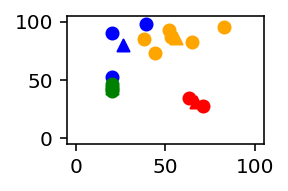

In [30]:
def plot_clusters(clusters, i):
    colours = iter(('blue', 'orange', 'green', 'red', 'purple',
                    'brown', 'pink', 'gray', 'olive', 'cyan'
                   )
                  )
    plt.subplot(f'33{i}')
    plt.axis((-5, 105, -5, 105))
    for centroid in clusters:
        colour = next(colours)
        plt.scatter(*centroid, marker='^', c=colour)
        plt.scatter(*zip(*clusters[centroid]), c=colour)
        
plot_clusters(cluster_with(centroids)[0], 2)

The function that follows completes the task of calling `cluster_with()` for long enough, but no more than 8 times, to compute the next set of clusters and associated centres of gravity, and in case the latter are different to the set of centroids on the basis of which the set of clusters was determined, display the clusters in the appropriate part of the picture and update the centroids. In the unlikely case the original centroids would be the centres of gravity of the set of clusters first computed, the clusters would still be displayed in the middle of the first row of a picture of size 12 inches by 12 inches:

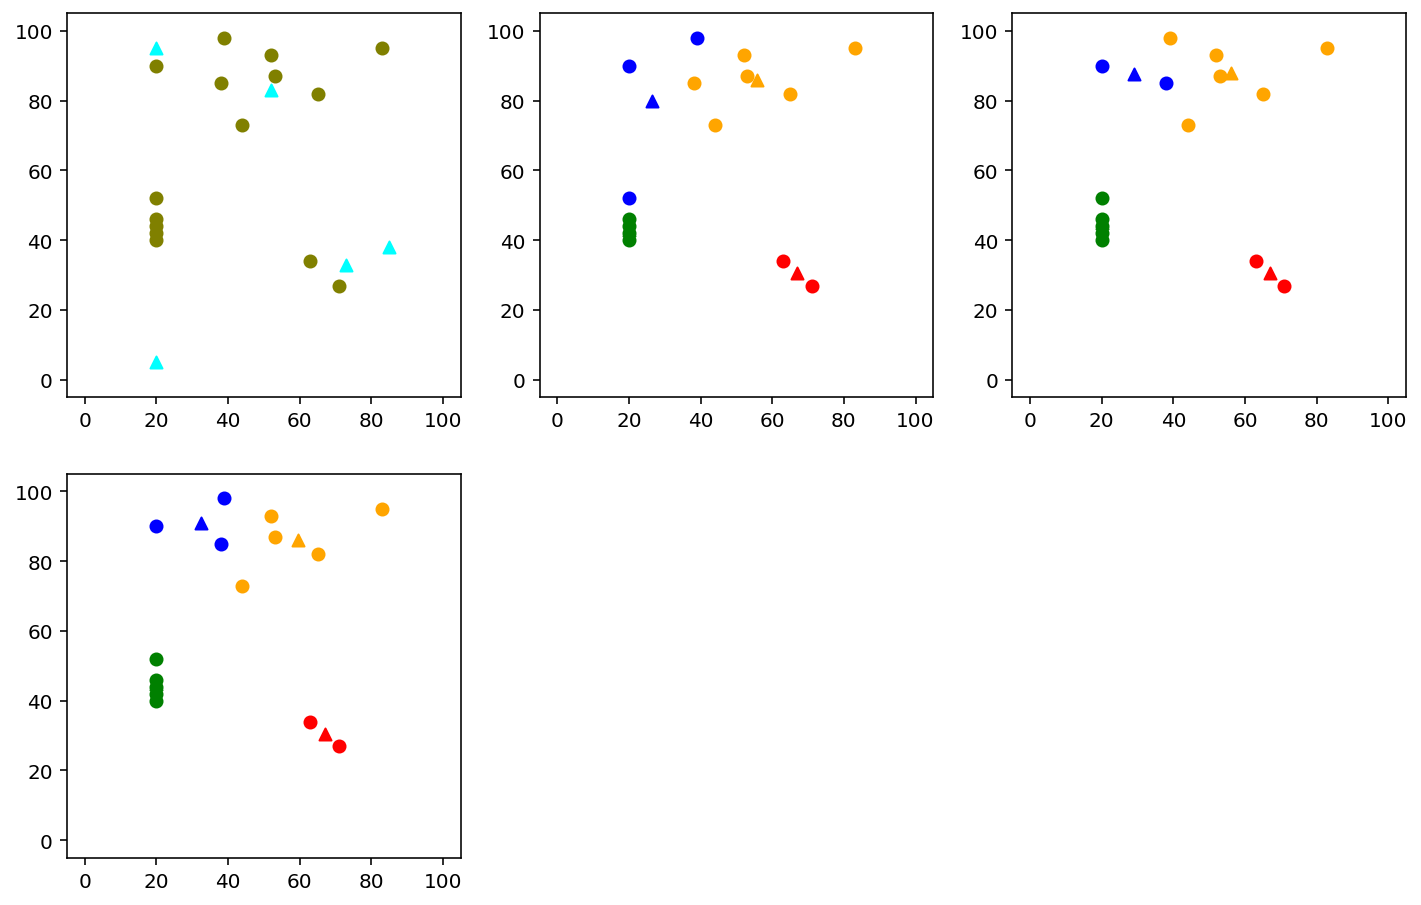

In [28]:
def iterate_and_plot_clusters(centroids):
    if len(centroids) > 10:
        print('At most 10 centroids accepted')
        return
    plt.figure(figsize = (12, 12))
    plt.subplot(331)
    plt.axis((-5, 105, -5, 105))
    plt.scatter(*zip(*centroids), marker='^', c='cyan')
    plt.scatter(*zip(*points), c='olive')
    for i in range(2, 10):
        clusters, new_centroids = cluster_with(centroids)
        if i == 2:
            plot_clusters(clusters, i)
        if new_centroids:
            centroids = clusters.keys()
            if i > 2:
                plot_clusters(clusters, i)
        else:
            break

iterate_and_plot_clusters(centroids)